### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

%matplotlib inline

### Loading the Data

In [2]:
df=pd.read_csv('MagicBricks.csv')
df.head(10)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0
6,1350.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,10000000,Ready_to_move,Resale,Builder_Floor,6667.0
7,650.0,2,2.0,Semi-Furnished,"Delhi Homes, Rohini Sector 24",1.0,4000000,Ready_to_move,New_Property,Apartment,6154.0
8,985.0,3,3.0,Unfurnished,Rohini Sector 21,1.0,6800000,Almost_ready,New_Property,Builder_Floor,6154.0
9,1300.0,4,4.0,Semi-Furnished,Rohini Sector 22,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,6154.0


In [3]:
df.tail()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0
1258,11050.0,3,3.0,Unfurnished,Chittaranjan Park,1.0,18500000,Ready_to_move,New_Property,Builder_Floor,12916.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [5]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [6]:
df.shape

(1259, 11)

### Data Pre-processing

In [7]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [8]:
df['Parking']=df['Parking'].fillna(df['Parking'].mean())

In [9]:
df['Per_Sqft']=df['Per_Sqft'].fillna(df['Per_Sqft'].mean())

In [10]:
df['Bathroom']=df['Bathroom'].fillna(df['Bathroom'].mean())

In [11]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     5
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           5
Per_Sqft       0
dtype: int64

In [12]:
df.drop(['Furnishing', 'Transaction', 'Status', 'Locality'],axis=1,inplace=True)

In [13]:
df.isnull().sum()

Area        0
BHK         0
Bathroom    0
Parking     0
Price       0
Type        5
Per_Sqft    0
dtype: int64

In [14]:
df.head()

,Area,BHK,Bathroom,Parking,Price,Type,Per_Sqft
0,800.0,3,2.0,1.0,6500000,Builder_Floor,15690.136542
1,750.0,2,2.0,1.0,5000000,Apartment,6667.000000
2,950.0,2,2.0,1.0,15500000,Apartment,6667.000000
3,600.0,2,2.0,1.0,4200000,Builder_Floor,6667.000000
4,650.0,2,2.0,1.0,6200000,Builder_Floor,6667.000000


### Feature Selection

In [15]:
data = df.copy()

In [16]:
data=pd.get_dummies(data,drop_first=True)

In [17]:
data.head()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Type_Builder_Floor
0,800.0,3,2.0,1.0,6500000,15690.136542,1
1,750.0,2,2.0,1.0,5000000,6667.000000,0
2,950.0,2,2.0,1.0,15500000,6667.000000,0
3,600.0,2,2.0,1.0,4200000,6667.000000,1
4,650.0,2,2.0,1.0,6200000,6667.000000,1


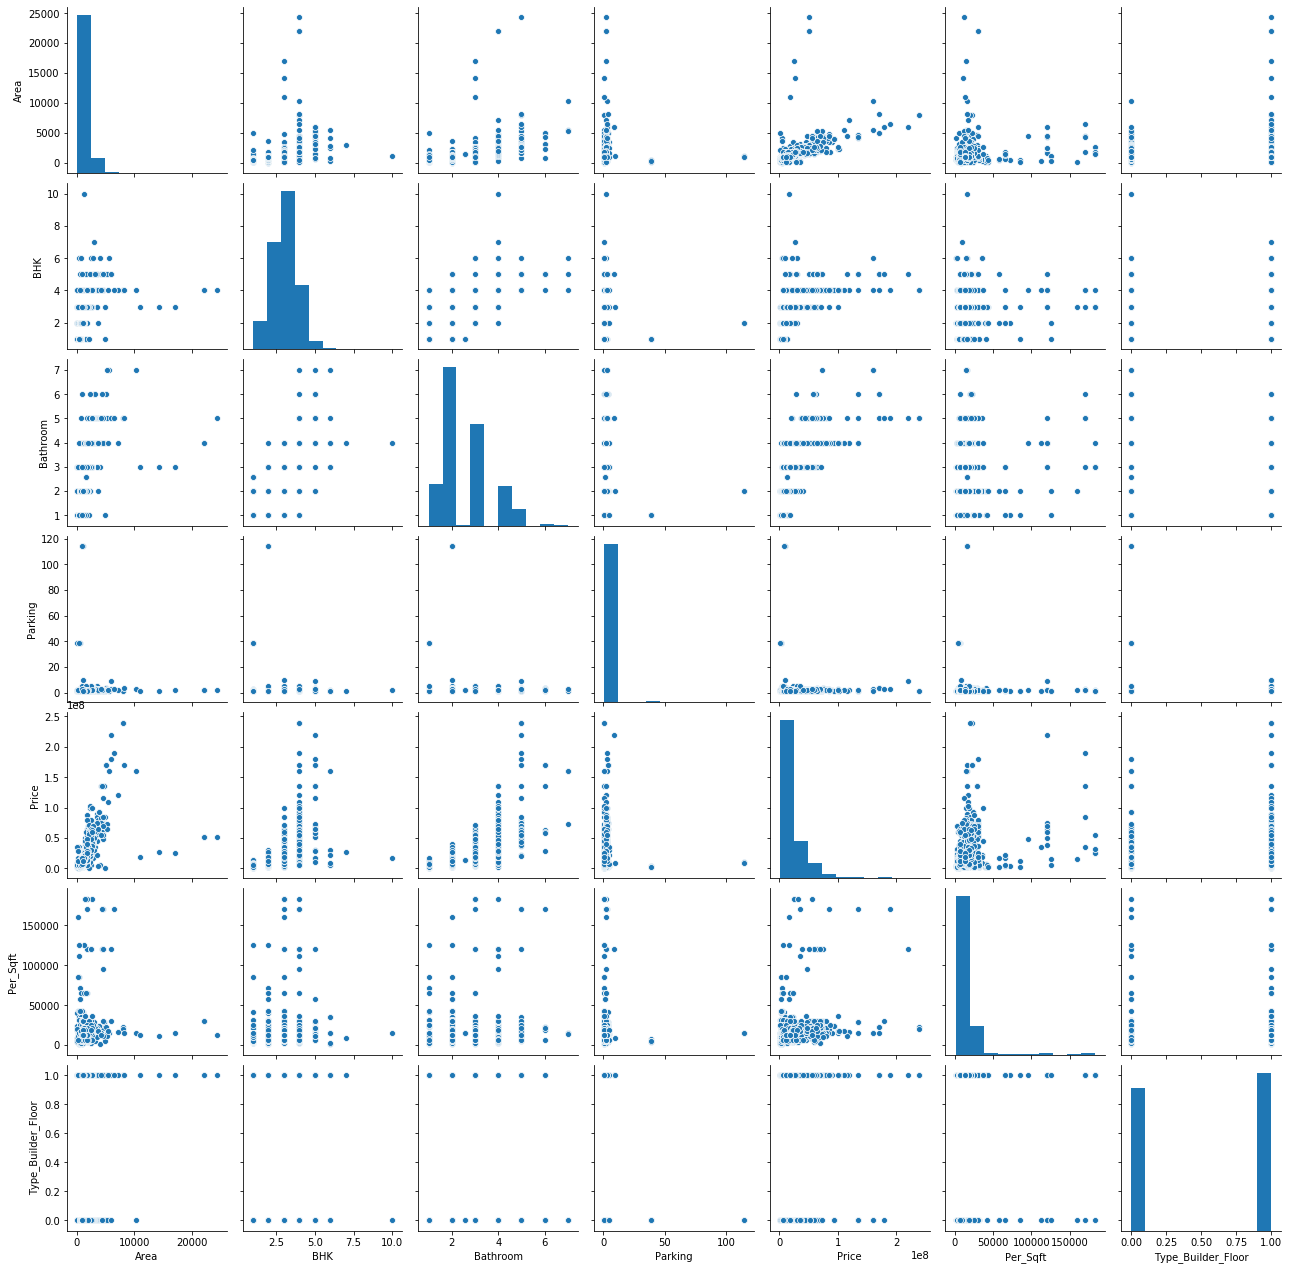

In [18]:
sns.pairplot(data)

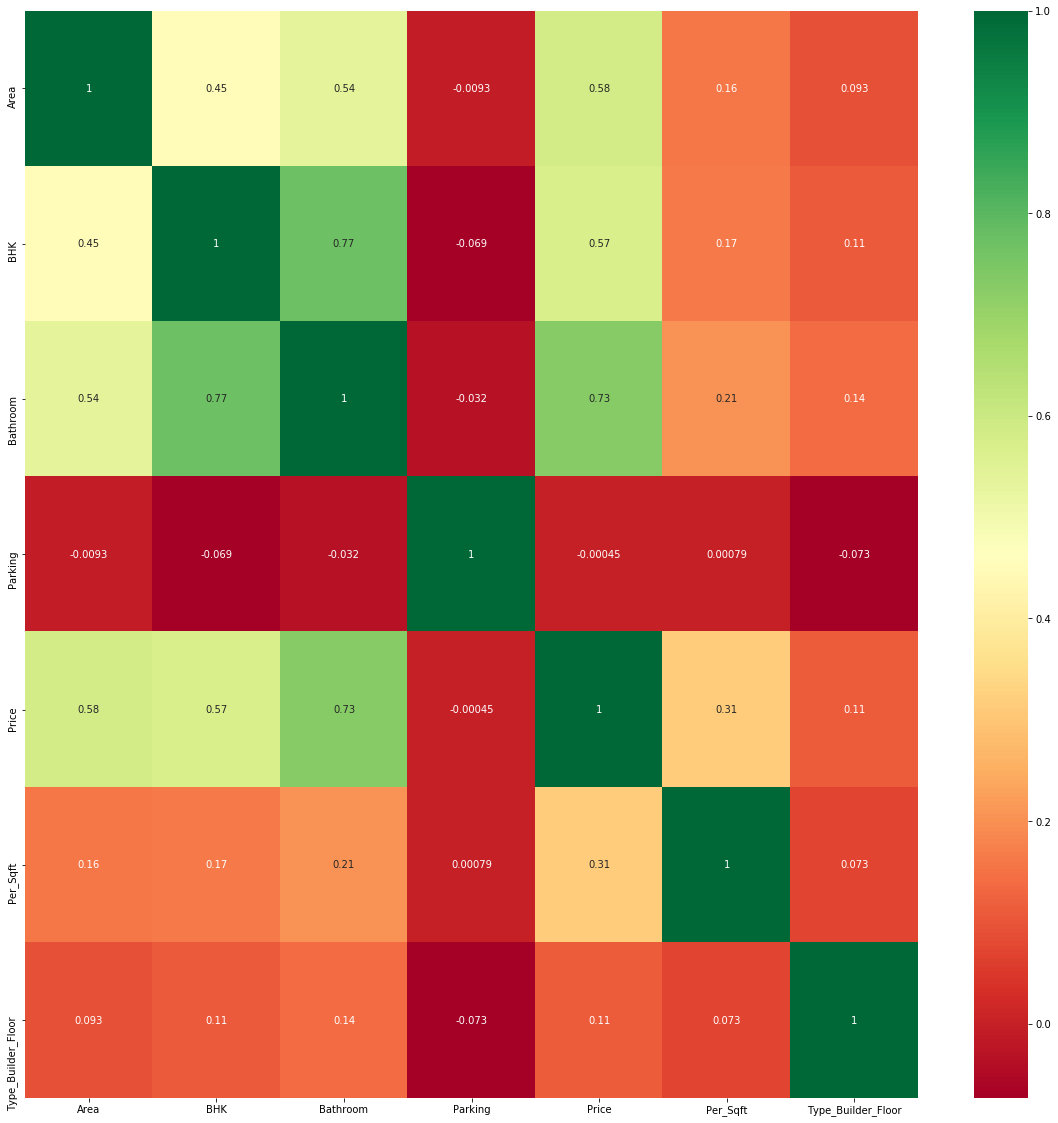

In [19]:
corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20, 20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Text(0, 0.5, 'Area')

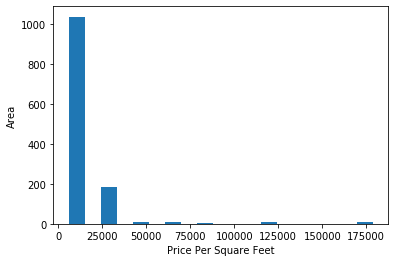

In [20]:
plt.hist(data.Per_Sqft, rwidth=0.5)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Area')

Text(0, 0.5, 'Price')

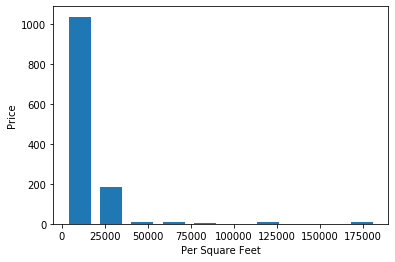

In [21]:
plt.hist(data.Per_Sqft, rwidth=0.7)
plt.xlabel('Per Square Feet')
plt.ylabel('Price')

                        Area       BHK  Bathroom   Parking     Price  \
Area                1.000000  0.449438  0.535104 -0.009266  0.580836   
BHK                 0.449438  1.000000  0.771083 -0.069320  0.571523   
Bathroom            0.535104  0.771083  1.000000 -0.032294  0.728054   
Parking            -0.009266 -0.069320 -0.032294  1.000000 -0.000446   
Price               0.580836  0.571523  0.728054 -0.000446  1.000000   
Per_Sqft            0.160678  0.165145  0.206706  0.000786  0.313061   
Type_Builder_Floor  0.093336  0.107374  0.138168 -0.073266  0.113964   

                    Per_Sqft  Type_Builder_Floor  
Area                0.160678            0.093336  
BHK                 0.165145            0.107374  
Bathroom            0.206706            0.138168  
Parking             0.000786           -0.073266  
Price               0.313061            0.113964  
Per_Sqft            1.000000            0.073444  
Type_Builder_Floor  0.073444            1.000000  


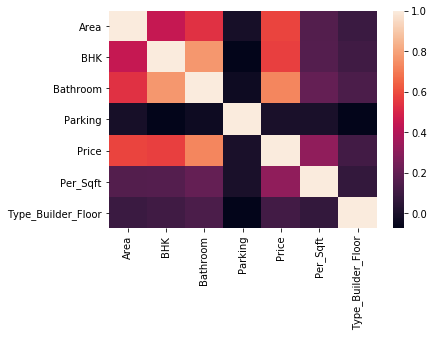

In [22]:
corr = data.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

### Model Selection

In [23]:
y = data['Price']
X = data.drop('Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=100)

In [25]:
model1 = LinearRegression()

model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
predictions = model1.predict(X_test)

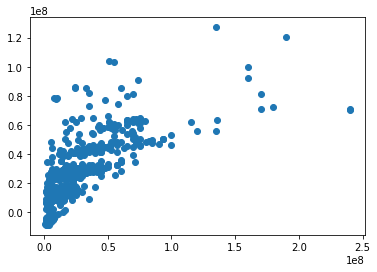

In [27]:
plt.scatter(y_test,predictions)

In [28]:
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

prediction_rfr = model2.predict(X_test)

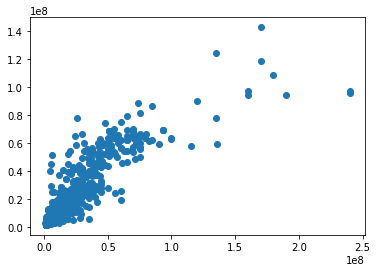

In [29]:
plt.scatter(y_test,prediction_rfr)

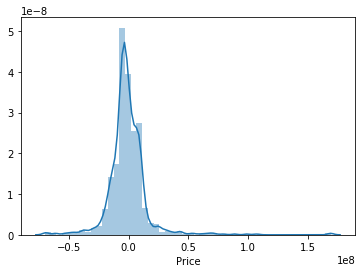

In [30]:
sns.distplot(y_test-predictions)

In [31]:
#model1.score(X_test, y_test)
print("Model1 Accuracy: "+repr(round(model1.score(X_test, y_test) * 100, 2)) + "%")

Model1 Accuracy: 55.22%


In [32]:
#model2.score(X_test, y_test)
print("Model2 Accuracy: "+repr(round(model2.score(X_test, y_test) * 100, 2)) + "%")

Model2 Accuracy: 75.42%


### Prediction

In [40]:
#Since model2 i.e. RandomForestRegressor has the highest accuracy, we'll continue our prediction with it.

'''
predictionProbability = model2.predict_proba(X_test)
prediction = model2.predict(X_test)
print('Probability:', predictionProbability)
print('prediction:', prediction)
'''

"\npredictionProbability = model2.predict_proba(X_test)(SVC(kernel='linear',probability=True))\nprediction = model2.predict(X_test)\nprint('Probability:', predictionProbability)\nprint('prediction:', prediction)\n"

In [43]:
X.columns

Index(['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft', 'Type_Builder_Floor'], dtype='object')

In [47]:
def Prediction(Area, BHK, Bathroom, Parking, Per_Sqft, Type_Builder_Floor):
    x=np.zeros(len(X.columns))
    x[0]=Area
    x[1]=BHK
    x[3]=Bathroom
    x[4]=Parking
    x[5]=Per_Sqft
    x[6]=Type_Builder_Floor
    
    x=sc.transform([x])(0)
    return model2.predict([x])(0)

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 10121223.588168107
MSE: 301611014269408.56
RMSE: 17366951.784046866


In [46]:
import pickle
file = open('RandomForestRegression_model.pkl', 'wb')

pickle.dump(model2, file)